# Machine Learning - Heart Disease 

## Loading appropriate libraries

In [1]:
#Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import os
print(os.listdir("./"))

['.ipynb_checkpoints', 'Heart.csv', 'heartDiseaseAndAges.png', 'ML Project.ipynb']


## Read Data

In [3]:
# Loading the Data
data=pd.read_csv('./Heart.csv')

The meaning of the column headers 

1.age: The person's age in years

2.sex: The person's sex (1 = male, 0 = female)

3.cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

4.trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5.chol: The person's cholesterol measurement in mg/dl

6.fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7.restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8.thalach: The person's maximum heart rate achieved

9.exang: Exercise induced angina (1 = yes; 0 = no)

10.oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

11.slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12.ca: The number of major vessels (0-3)

13.thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14.target: Heart disease (0 = no, 1 = yes)


In [4]:
# First 5 Rows
print('First 5 Rows\n')
data.head()

First 5 Rows



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Last 5 Rows
print('Last 5 Rows\n')
data.tail()

Last 5 Rows



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Describe Data
print('Data Describe\n')
data.describe()

Data Describe



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#Columns
print('Data Columns:\n')
data.columns

In [8]:
# Missing dData
print('Data Sum of Null Values \n')
data.isnull().sum()

Data Sum of Null Values 



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#Pandas profiling provides analysis like type, unique values, missing values, quantile statistics, mean, mode, median, standard deviation, sum, skewness, frequent values, histograms, correlation between variables, count, heatmap visualization, etc.
import pandas_profiling
x=pandas_profiling.ProfileReport(data)
x

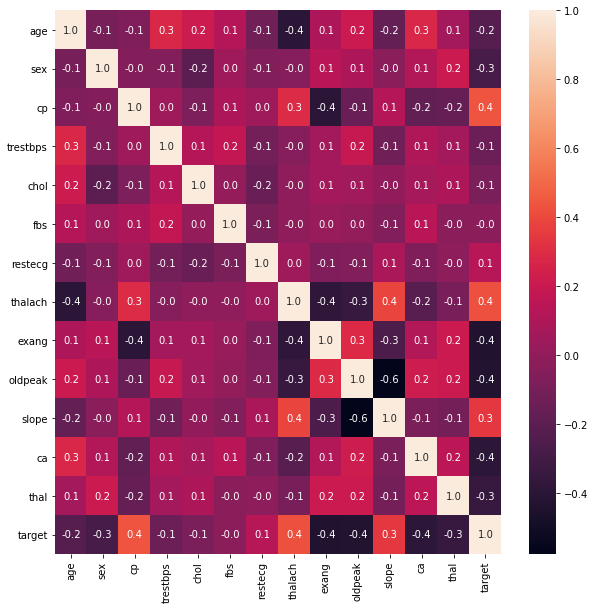

In [41]:
%matplotlib inline
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

In [42]:
data_corr=data.corr()['target'][:-1]
feature_list=data_corr[abs(data_corr)>0.1].sort_values(ascending=False)
feature_list

cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

## Data Exploration

### Target

In [10]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

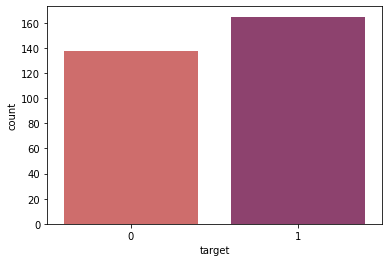

In [19]:
sns.countplot(x="target", data=data, palette="flare")
plt.show()

In [14]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


In [22]:
data.groupby('target').mean() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


### Sex

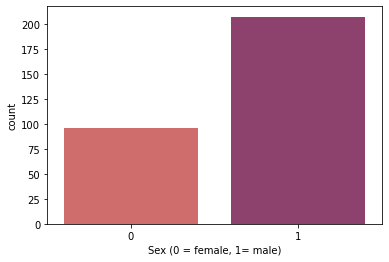

In [18]:
sns.countplot(x='sex', data=data, palette="flare")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [20]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(data.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(data.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


### Heart Disease Frequency for Sex

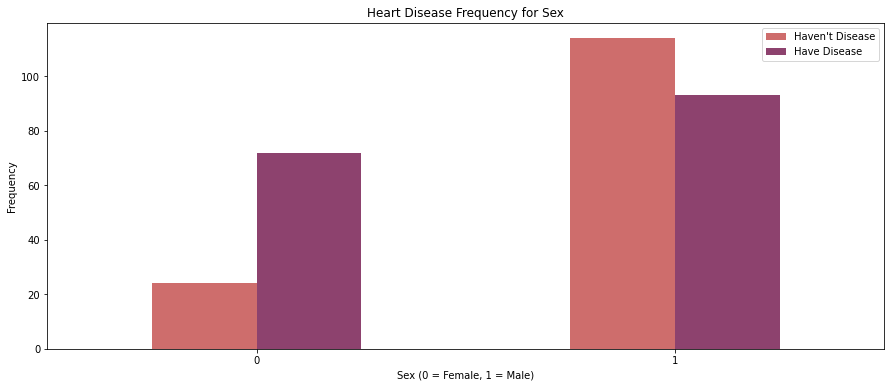

In [28]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['#ce6d6c','#8d426e' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

### Heart Disease Frequency for Ages

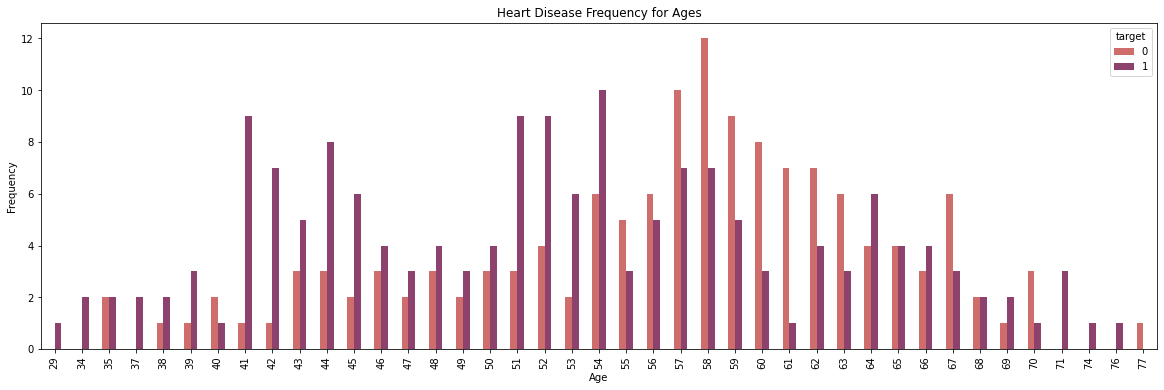

In [26]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6),color=['#ce6d6c','#8d426e' ])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

### Heart Disease Frequency for Slope

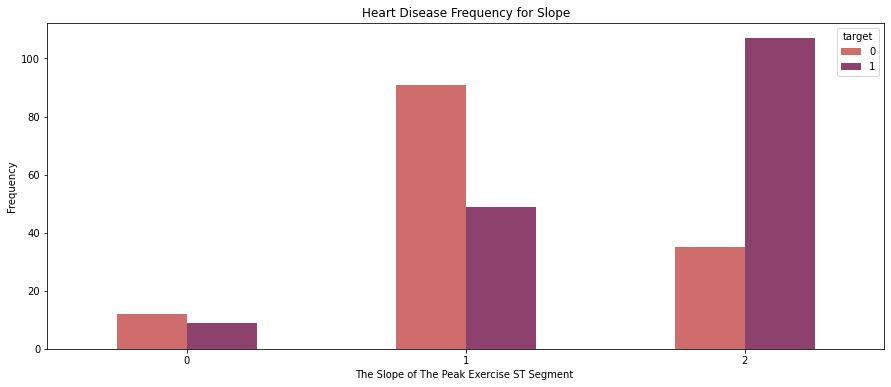

In [31]:
pd.crosstab(data.slope,data.target).plot(kind="bar",figsize=(15,6),color=['#ce6d6c','#8d426e' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

### Heart Disease Frequency According To FBS

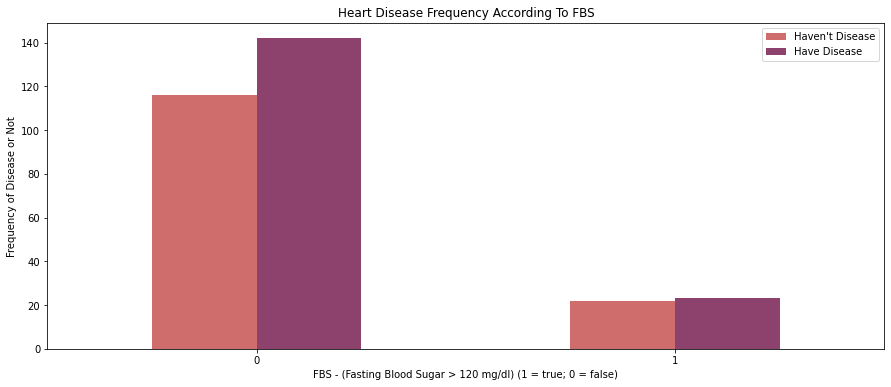

In [32]:
pd.crosstab(data.fbs,data.target).plot(kind="bar",figsize=(15,6),color=['#ce6d6c','#8d426e' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

### Heart Disease Frequency According To Chest Pain Type

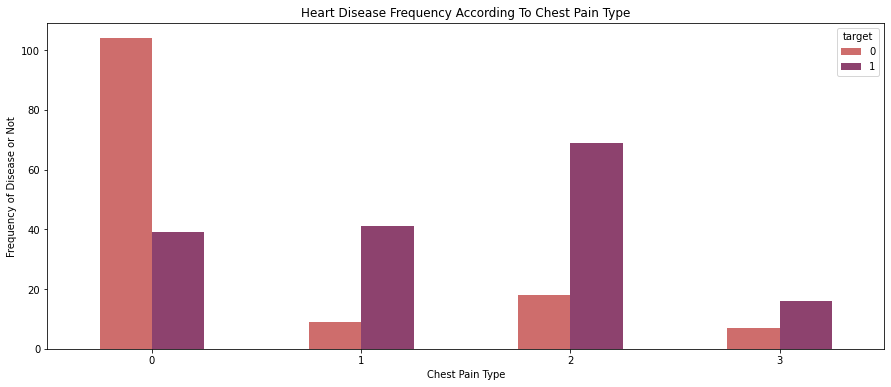

In [35]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(15,6),color=['#ce6d6c','#8d426e'])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

### Maximum Heart Rate

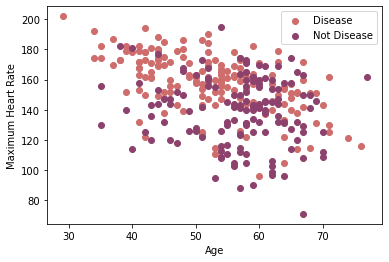

In [39]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="#ce6d6c")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)], c="#8d426e")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

### Creating Dummy Variables


##### From the dataset 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.

In [52]:
a = pd.get_dummies(data['cp'], prefix = "cp")
b = pd.get_dummies(data['thal'], prefix = "thal")
c = pd.get_dummies(data['slope'], prefix = "slope")

In [55]:
frames = [data, a, b, c]
data = pd.concat(frames, axis = 1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [57]:
data = data.drop(columns = ['cp', 'thal', 'slope'])
data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


### Feature selection

#### **>>** Xstant=X-mean(X)/st.dev(X)

#### **>>** Xnorm=X-min(X)/max(X)-min(X)

In [60]:
X = data.drop(['target'], axis = 1)
y = data.target.values

#### Spliting the 80% of the dataset into train_data and 20% of the dataset into test_data

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [62]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

## Creating Different Machine Learning Model 

#### Training & Testing of Model

The machine learning algorithms : 
* 1.Logistic Regression
> The meaning of the term regression is very simple: any process that attempts to find relationships between variables is called regression. Logistic regression is regression because it finds relationships between variables. It is logistic because it uses logistic function as a link function.
* 2.Support Vector Machine (SVM)
> A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. 
* 3.K Nearest Neighborhood (kNN)
> K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition
* 4.Gradient Boosting Classifier
> Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models
* 5.Random Forest Classifier
> Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees
* 6.Gaussian NB
> Other functions can be used to estimate the distribution of the data, but the Gaussian (or Normal distribution) is the easiest to work with because we only need to estimate the mean and the standard deviation from the training data.
* 7.DecisionTree Classifier algorithms. 
> A decision tree classifier is a tree in which internal nodes are labeled by features. The classifier categorizes an object xi by recursively testing for the weights that the features labeling the internal nodes have in vector xi, until a leaf node is reached. The label of this node is then assigned to xi

In [153]:
#LogisticRegression
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)

#SVM classifier
svc_c=SVC(kernel='linear',random_state=0)
svc_c.fit(X_train,y_train)
svc_pred=svc_c.predict(X_test)
sv_cm=confusion_matrix(y_test,svc_pred)
sv_ac=accuracy_score(y_test, svc_pred)

#Bayes
gaussian=GaussianNB()
gaussian.fit(X_train,y_train)
bayes_pred=gaussian.predict(X_test)
bayes_cm=confusion_matrix(y_test,bayes_pred)
bayes_ac=accuracy_score(bayes_pred,y_test)

#SVM regressor
svc_r=SVC(kernel='rbf')
svc_r.fit(X_train,y_train)
svr_pred=svc_r.predict(X_test)
svr_cm=confusion_matrix(y_test,svr_pred)
svr_ac=accuracy_score(y_test, svr_pred)

#RandomForest
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)

# DecisionTree Classifier
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
dtree_ac=accuracy_score(dtree_pred,y_test)

#KNN
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
knn_cm=confusion_matrix(y_test,knn_pred)
knn_ac=accuracy_score(knn_pred,y_test)

Logistic TRAIN score with  0.8677685950413223
Logistic TEST score with  0.8524590163934426


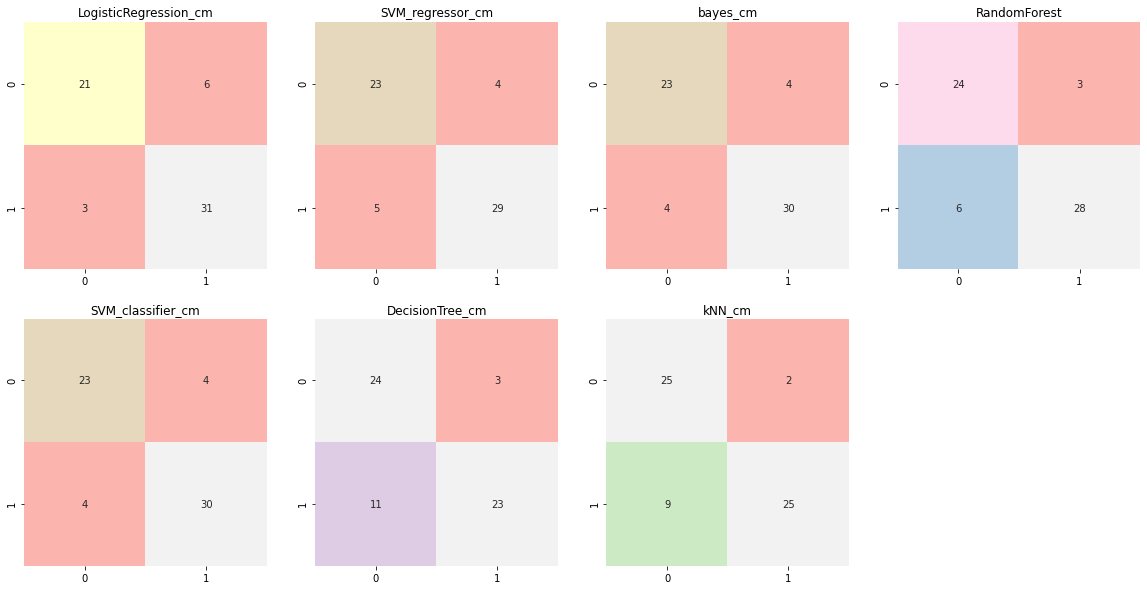

In [107]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.title("LogisticRegression_cm")
sns.heatmap(lr_cm,annot=True,cmap="Pastel1",fmt="d",cbar=False)
plt.subplot(2,4,2)
plt.title("SVM_regressor_cm")
sns.heatmap(sv_cm,annot=True,cmap="Pastel1",fmt="d",cbar=False)
plt.subplot(2,4,3)
plt.title("bayes_cm")
sns.heatmap(bayes_cm,annot=True,cmap="Pastel1",fmt="d",cbar=False)
plt.subplot(2,4,4)
plt.title("RandomForest")
sns.heatmap(rdf_cm,annot=True,cmap="Pastel1",fmt="d",cbar=False)
plt.subplot(2,4,5)
plt.title("SVM_classifier_cm")
sns.heatmap(svr_cm,annot=True,cmap="Pastel1",fmt="d",cbar=False)
plt.subplot(2,4,6)
plt.title("DecisionTree_cm")
sns.heatmap(dtree_cm,annot=True,cmap="Pastel1",fmt="d",cbar=False)
plt.subplot(2,4,7)
plt.title("kNN_cm")
sns.heatmap(knn_cm,annot=True,cmap="Pastel1",fmt="d",cbar=False)
plt.show()

### Accuracy of the models

In [130]:
print('LogisticRegression_accuracy:\t',lr_ac)
print('SVM_regressor_accuracy:\t\t',svr_ac)
print('Bayes_accuracy:\t\t\t\t',bayes_ac)
print('RandomForest_accuracy:\t\t',rdf_ac)
print('SVM_classifier_accuracy:\t\t',sv_ac)
print('DecisionTree_accuracy:\t\t\t',dtree_ac)
print('KNN_accuracy:\t\t\t\t',knn_ac)

LogisticRegression_accuracy:	 0.8524590163934426
SVM_regressor_accuracy:		 0.8688524590163934
Bayes_accuracy:				 0.8688524590163934
RandomForest_accuracy:		 0.8524590163934426
SVM_classifier_accuracy:		 0.8524590163934426
DecisionTree_accuracy:			 0.7704918032786885
KNN_accuracy:				 0.819672131147541


Text(0.5, 1.0, 'Model Accracy')

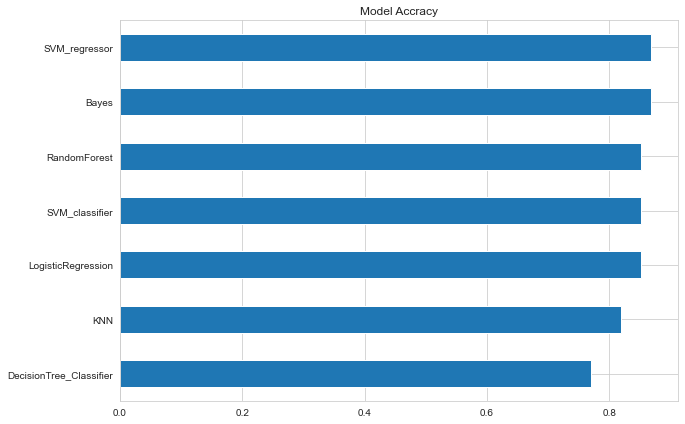

In [131]:
model_accuracy = pd.Series(data=[lr_ac,sv_ac,bayes_ac,svr_ac,rdf_ac,dtree_ac,knn_ac], 
                index=['LogisticRegression','SVM_classifier','Bayes','SVM_regressor',
                                      'RandomForest','DecisionTree_Classifier','KNN'])
fig= plt.figure(figsize=(10,7), facecolor=None,)
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')


### TRAIN score

In [166]:
print('LogisticRegression TRAIN score:\t',format(lr_c.score(X_train, y_train)))
print('SVM_regressor TRAIN score:\t',format(svc_r.score(X_train, y_train)))
print('Bayes TRAIN score:\t\t\t',format(gaussian.score(X_train, y_train)))
print('Random Forest TRAIN score:\t\t',format(rdf_c.score(X_train, y_train)))
print('SVM_classifier TRAIN score:\t\t',format(svc_c.score(X_train, y_train)))
print('DecisionTree TRAIN score:\t\t',format(dtree_c.score(X_train, y_train)))
print('KNN TRAIN score:\t\t\t\t',format(knn.score(X_train, y_train)))

LogisticRegression TRAIN score:	 0.8677685950413223
SVM_regressor TRAIN score:	 0.9090909090909091
Bayes TRAIN score:			 0.8471074380165289
Random Forest TRAIN score:		 0.9793388429752066
SVM_classifier TRAIN score:		 0.8677685950413223
DecisionTree TRAIN score:		 1.0
KNN TRAIN score:				 0.8801652892561983


### TEST score


In [167]:
print('LogisticRegression TRAIN score:\t',format(lr_c.score(X_test, y_test)))
print('SVM_regressor TRAIN score:\t',format(svc_r.score(X_test, y_test)))
print('Bayes TRAIN score:\t\t\t',format(gaussian.score(X_test, y_test)))
print('Random Forest TRAIN score:\t\t',format(rdf_c.score(X_test, y_test)))
print('SVM_classifier TRAIN score:\t\t',format(svc_c.score(X_test, y_test)))
print('DecisionTree TRAIN score:\t\t',format(dtree_c.score(X_test, y_test)))
print('KNN TRAIN score:\t\t\t\t',format(knn.score(X_test, y_test)))

LogisticRegression TRAIN score:	 0.8524590163934426
SVM_regressor TRAIN score:	 0.8688524590163934
Bayes TRAIN score:			 0.8688524590163934
Random Forest TRAIN score:		 0.8524590163934426
SVM_classifier TRAIN score:		 0.8524590163934426
DecisionTree TRAIN score:		 0.7704918032786885
KNN TRAIN score:				 0.819672131147541


#### ROC and Precision Recall Curve for the model which gives the heighest accuracy

* A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.
* A precision-recall curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds, much like the ROC curve. A no-skill classifier is one that cannot discriminate between the classes and would predict a random class or a constant class in all cases


In [128]:
def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')

#### Logistic Regression

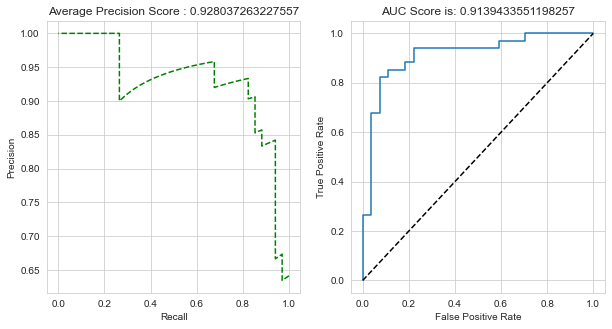

In [187]:
plotting(y_test,lr_c.predict_proba(X_test))

#### Bayes

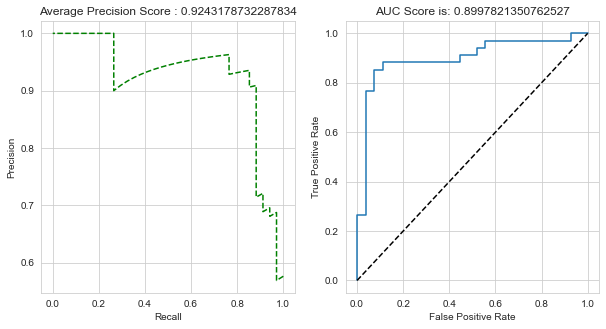

In [188]:
plotting(y_test,gaussian.predict_proba(X_test))

#### Random Forest

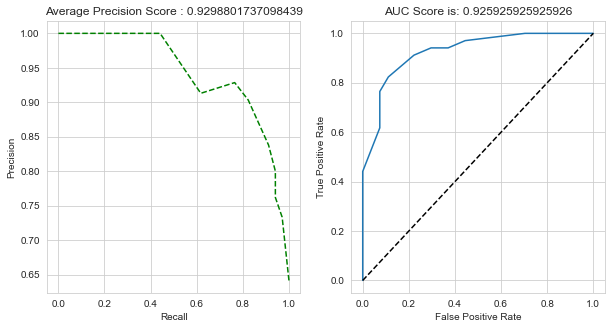

In [189]:
plotting(y_test,rdf_c.predict_proba(X_test))

#### Decision Tree

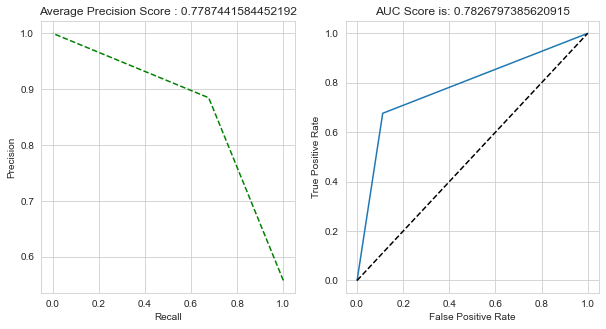

In [190]:
plotting(y_test,dtree_c.predict_proba(X_test))

#### KNN

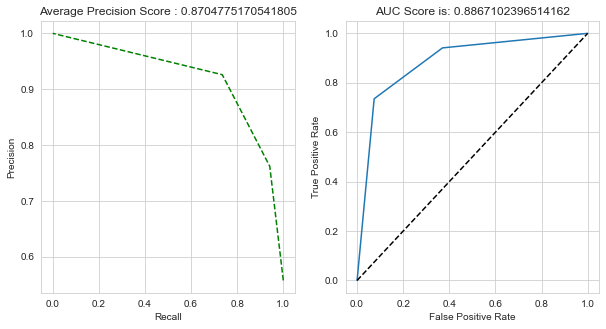

In [191]:
plotting(y_test,knn.predict_proba(X_test))